In [66]:
import pandas as pd
import matplotlib.pyplot as plt

csv = 'C:\\Users\\Alex\\Downloads\\weight-height.csv'

df = pd.read_csv(csv)
df.head

<bound method NDFrame.head of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971110
8       Male  67.018950  175.929440
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
12      Male  64.766329  167.127461
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
24      Male  67.893196  162.006652
25      Male  68.144033  192.34397

In [67]:
x_train = df['Height'].values
x_train = x_train * 2.54
x_train = x_train / 200.65680556
y_train = df['Weight'].values
y_train = y_train / 2.2046226218
y_train = y_train / 122.46526722

X = np.array(x_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)

X = X[:5000]
y = y[:5000]

print(max(X))
print(max(y))


[1.]
[1.]


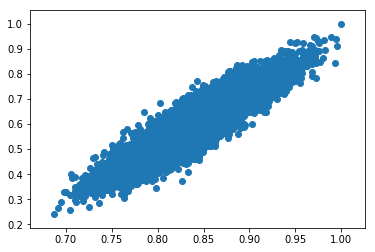

[[0.93478725]
 [0.87067087]
 [0.93811753]
 [0.90800152]
 [0.88459378]
 [0.85131755]
 [0.87071109]
 [0.86518486]
 [0.84835464]
 [0.80325955]]
[[0.89593627]
 [0.60117284]
 [0.78795916]
 [0.81500321]
 [0.76428768]
 [0.56377023]
 [0.68124039]
 [0.62213896]
 [0.65161538]
 [0.57928016]]


In [68]:
plt.figure()
plt.scatter(x_train, y_train, c=None)
plt.show()
print(X[:10])
print(y[:10])

Train on 4500 samples, validate on 500 samples
Epoch 1/3
4500/4500 [==============================] - 4s 868us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 2/3
4500/4500 [==============================] - 3s 682us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/3
4500/4500 [==============================] - 3s 668us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


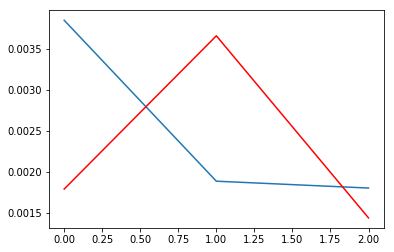

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

model = Sequential()
model.add(Dense(36, activation='relu'))
model.add(Dense(18))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

history = model.fit(X,y, batch_size=1, epochs=3, validation_split=0.1)

plt.plot(history.history['mean_squared_error'], c=None)
plt.plot(history.history['val_mean_squared_error'], c='r')


In [86]:
x_test = np.array([[160],[150],[180],[175],[200]]) / 200.65680556
x_test = np.array(x_test).reshape(-1,1)
prediction = model.predict(x_test) * 122.46526722
print(prediction)

[[ 70.67735 ]
 [ 61.163193]
 [ 90.9133  ]
 [ 85.846954]
 [111.178535]]


Text(0,0.5,'Weight')

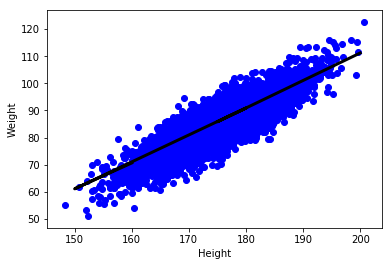

In [87]:
plt.plot(x_test * 200.65680556 , prediction, c='black', linewidth=3)
plt.scatter(X* 200.65680556,y*122.46526722, c='b')
plt.xlabel("Height")
plt.ylabel("Weight")

In [ ]:
#model.save("Weight-Height.model")

In [ ]:
#model.save("Weight-Height.json")